In [3]:

"""
s = mybase1(N)

Calculate finite base1 sum
"""
function mybase1(N)
    s = 0.0
    for n = 1:N
        s += 1/n^2
    end
    return s
end

mybase1

In [4]:
round(abs(mybase1(2000) - pi^2/6),sigdigits = 1)

0.0005

In [5]:
function myrichardson(N)
    s1 = mybase1(N)
    s2 = mybase1(2*N)
    return 2*s2 - s1
end


myrichardson (generic function with 1 method)

In [6]:
round(abs(myrichardson(1000) - pi^2/6), sigdigits = 1)

2.0e-7

In [7]:
round(abs(mybase1(5000000) - pi^2/6), sigdigits = 1)

2.0e-7

In [8]:
] add QuadGK

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-tec22001/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-tec22001/Manifest.toml`


In [9]:
using QuadGK

In [10]:
fun1(x) = 1/sqrt(x)

fun1 (generic function with 1 method)

In [11]:
round(quadgk(fun1, 0, 1)[1], sigdigits = 5) # function, bottom lim of int, top lim of int [how many values you need]


2.0

In [12]:
fun2(x) = exp(-x) * log(x)

fun2 (generic function with 1 method)

In [13]:
quadgk(fun2, 0, Inf) #output: gamma (euler's const), error

(-0.5772156640944036, 4.619449696675028e-9)

# Euler's method for IVP

In [14]:
"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a, b, n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1

    for i = 1: n-1
        y[i+1] = y[i] + h * fun(t[i], y[i])
    end
    
    return t, y
end

myeulers

In [15]:
a = 0.0
b = 5.0
n = 64
y1 = 0
fun(t, y) = exp(-sin(t)) - y * cos(t)

yexact(t) = t * exp( -sin(t))

yexact (generic function with 1 method)

In [16]:

t, y = myeulers(fun, a, b, n, y1);

In [17]:
using PyPlot

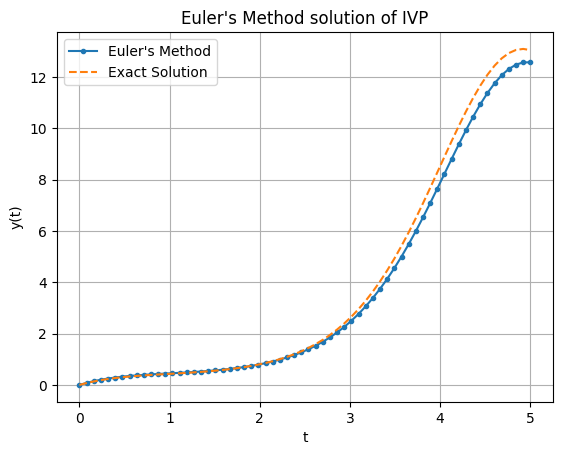

In [18]:
plot(t, y, label="Euler's Method", marker = ".")
plot(t, yexact.(t), label = "Exact Solution", linestyle = "dashed")
legend()
xlabel("t")
ylabel("y(t)")
title("Euler's Method solution of IVP")
grid(true)

In [20]:
np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun, a, b, n, y1)
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])

end


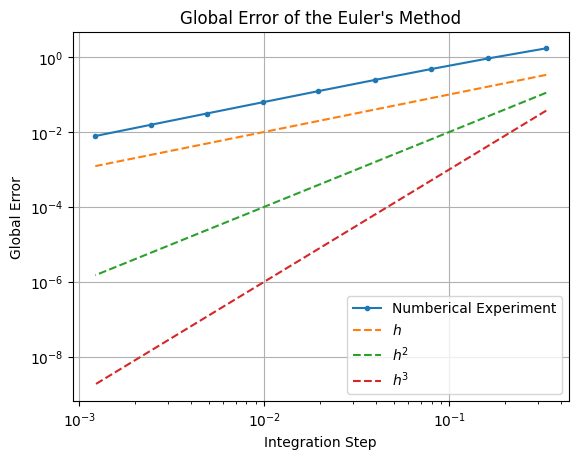

PyObject Text(24.000000000000007, 0.5, 'Global Error')

In [26]:
loglog(hh, gerr, marker=".", label="Numberical Experiment")
loglog(hh,hh, linestyle="dashed",label = L"h")
loglog(hh,hh.^2, linestyle="dashed",label = L"h^2")
loglog(hh,hh.^3, linestyle="dashed",label = L"h^3")


grid(true)
title("Global Error of the Euler's Method")
legend()
xlabel("Integration Step")
ylabel("Global Error")